<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [10]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

C:\Users\eneph\Anaconda3\envs\U4-S1-NLP\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [1]:
import pandas as pd

df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [2]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
#stopwords = set(stopwords).union(set(['']))

In [12]:
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [16]:
tokenize('This is a SIMPLE test for a simpleton.')

['simple', 'test', 'simpleton']

In [24]:
tokens = df['reviews.text'].apply(tokenize)

In [26]:
tokens[1]

['bulk', 'expensive', 'way', 'products', 'like']

In [36]:
id2word = corpora.Dictionary(tokens)

In [37]:
id2word.doc2bow(tokenize('This TEST message like an echo! echo, echo...'))

[(13, 1), (434, 1), (3420, 3), (3540, 1)]

In [38]:
len(id2word.keys())

9622

In [39]:
id2word.filter_extremes(no_below=10, no_above=0.75)

In [40]:
len(id2word.keys())

2359

In [42]:
#setup the corpus
corpus = [id2word.doc2bow(text) for text in tokens]

In [43]:
#setup lda
lda = LdaMulticore(corpus=corpus, id2word=id2word, random_state=42, num_topics=15, passes=10, workers=4)

In [46]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [47]:
topics = [' '.join(t[0:5]) for t in words]

In [48]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
tablet great price black good

------ Topic 1 ------
kindle read reading light love

------ Topic 2 ------
tablet amazon apps store google

------ Topic 3 ------
batteries long work brand price

------ Topic 4 ------
product great happy recommend christmas

------ Topic 5 ------
battery batteries life great long

------ Topic 6 ------
easy tablet use screen size

------ Topic 7 ------
kindle better books bought new

------ Topic 8 ------
kids tablet great apps love

------ Topic 9 ------
issues device cover ipad ok

------ Topic 10 ------
old loves year bought love

------ Topic 11 ------
use easy great music alexa

------ Topic 12 ------
loves tablet daughter bought got

------ Topic 13 ------
great good price tablet quality

------ Topic 14 ------
perfect tablet internet books friendly



In [54]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        start=2,
                                                        limit=40,
                                                        step=6
                                                        )

In [63]:
coherence_values[0]

-2.5265089611666447

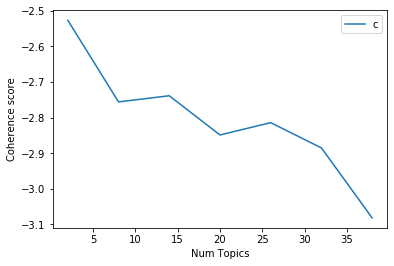

In [65]:
# Show graph
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## Looks like the fewer number of topics the better

In [67]:
#resetup lda
nlda = LdaMulticore(corpus=corpus, id2word=id2word, random_state=42, num_topics=3, passes=10, workers=4)

In [75]:
nwords = [re.findall(r'"([^"]*)"',t[1]) for t in nlda.print_topics()]

In [76]:
ntopics = [' '.join(t[0:5]) for t in nwords]

In [77]:
for id, t in enumerate(ntopics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
batteries great price good long

------ Topic 1 ------
great tablet love kindle loves

------ Topic 2 ------
tablet amazon apps great use



In [49]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [78]:
pyLDAvis.gensim.prepare(nlda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.178163 -0.078077       1        1  34.520866
0      0.231951 -0.033985       2        1  33.611122
2     -0.053787  0.112062       3        1  31.868019, topic_info=     Category         Freq       Term        Total  loglift  logprob
17    Default  6964.000000  batteries  6964.000000  30.0000  30.0000
16    Default  5875.000000      price  5875.000000  29.0000  29.0000
33    Default  6288.000000       good  6288.000000  28.0000  28.0000
1831  Default  7157.000000     tablet  7157.000000  27.0000  27.0000
1627  Default  2920.000000     kindle  2920.000000  26.0000  26.0000
1496  Default  2231.000000      loves  2231.000000  25.0000  25.0000
8     Default  2319.000000       work  2319.000000  24.0000  24.0000
22    Default  2395.000000       long  2395.000000  23.0000  23.0000
481   Default  2196.000000        old  2196.000000  22.0000  22.0000
86    Default  3398.000000       love  3398.000000  21.0000  21.0000
1286  Default  1933.000000       apps  1933.000000  20.0000  20.0000
679   Default  2967.000000       easy  2967.000000  19.0000  19.0000
19    Default  1184.000000      brand  1184.000000  18.0000  18.0000
360   Default  1199.000000      value  1199.000000  17.0000  17.0000
785   Default  1069.000000       gift  1069.000000  16.0000  16.0000
23    Default  3858.000000     amazon  3858.000000  15.0000  15.0000
101   Default  1818.000000       year  1818.000000  14.0000  14.0000
20    Default  9874.000000      great  9874.000000  13.0000  13.0000
706   Default  1188.000000       read  1188.000000  12.0000  12.0000
832   Default  1179.000000    reading  1179.000000  11.0000  11.0000
2     Default  2077.000000    battery  2077.000000  10.0000  10.0000
73    Default   809.000000     brands   809.000000   9.0000   9.0000
1633  Default  1497.000000      books  1497.000000   8.0000   8.0000
594   Default  1794.000000      games  1794.000000   7.0000   7.0000
27    Default  3158.000000     bought  3158.000000   6.0000   6.0000
6     Default  1479.000000    quality  1479.000000   5.0000   5.0000
400   Default   933.000000       deal   933.000000   4.0000   4.0000
185   Default  2590.000000       kids  2590.000000   3.0000   3.0000
1370  Default  1642.000000     screen  1642.000000   2.0000   2.0000
1086  Default   974.000000   daughter   974.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
859    Topic3   173.009094      apple   189.692917   1.0515  -6.3116
1831   Topic3  4301.040527     tablet  7157.662109   0.6342  -3.0984
891    Topic3   207.021439      video   235.493134   1.0147  -6.1322
23     Topic3  2189.792236     amazon  3858.845947   0.5770  -3.7734
226    Topic3   690.577209     device  1000.115356   0.7732  -4.9275
1927   Topic3   391.176025   download   516.319275   0.8660  -5.4958
185    Topic3  1474.325439       kids  2590.124512   0.5801  -4.1690
373    Topic3   389.591492      child   522.616699   0.8498  -5.4999
1201   Topic3   376.199036        kid   523.095703   0.8139  -5.5349
1995   Topic3   488.916901    tablets   761.062622   0.7010  -5.2728
381    Topic3   678.410950       play  1193.307861   0.5788  -4.9452
1230   Topic3   325.585114     access   442.752747   0.8362  -5.6794
385    Topic3   593.124329      store  1022.111816   0.5993  -5.0796
1370   Topic3   821.737183     screen  1642.483398   0.4510  -4.7536
90     Topic3  1538.937744        use  4423.558594   0.0877  -4.1261
615    Topic3   478.239258        set   812.107849   0.6140  -5.2949
1512   Topic3   488.787292       ipad   846.359009   0.5946  -5.2731
166    Topic3   823.550110       time  2046.498779   0.2333  -4.7514
33     Topic3  1510.699829       good  6288.259766  -0.2825  -4.1447
234    Topic3   434.699951       fast   731.353882   0.6233  -5.3903
11     Topic3   822.556946       like  2460.124512   0.0480  -4.7526
20     Topic3  1641.134399    

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling